In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
# Define the color masks
GRAVEYARD = ([252, 252, 252], [116, 116, 116])
FOREST = [(0, 168, 0), [252, 216, 168]]
MOUNT = [(200, 76, 12), [252, 216, 168]]

# Dictionary to access masks by name
MASKS = {
    "GRAVEYARD": GRAVEYARD,
    "FOREST": FOREST,
    "MOUNT": MOUNT
}

In [12]:
map_img = cv2.imread('map.png')
map_rgb = cv2.cvtColor(map_img, cv2.COLOR_BGR2RGB)
map_gray = cv2.cvtColor(map_rgb, cv2.COLOR_RGB2GRAY)

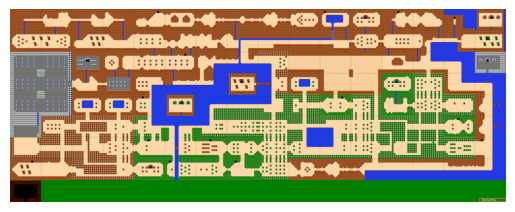

In [13]:
# Plot the image using matplotlib
plt.imshow(map_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [8]:
def change_pixels(image_path, output_path, mask_name):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image not found or unable to read at {image_path}.")
        return

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the target mask
    target_mask = MASKS[mask_name]

    # Get the masks to be changed
    masks_to_change = [mask for name, mask in MASKS.items() if name != mask_name]

    # Create masks for the colors to be changed
    mask1 = np.all(image_rgb == masks_to_change[0][0], axis=-1)
    mask2 = np.all(image_rgb == masks_to_change[0][1], axis=-1)
    mask3 = np.all(image_rgb == masks_to_change[1][0], axis=-1)
    mask4 = np.all(image_rgb == masks_to_change[1][1], axis=-1)

    # Apply the target mask colors
    image_rgb[mask1] = target_mask[0]
    image_rgb[mask2] = target_mask[1]
    image_rgb[mask3] = target_mask[0]
    image_rgb[mask4] = target_mask[1]

    # Convert the image back to BGR for saving
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Save the modified image
    modified_image_path = os.path.join(output_path, os.path.basename(image_path))
    cv2.imwrite(modified_image_path, image_bgr)

    return modified_image_path

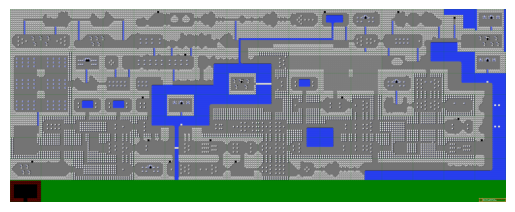

Modified image saved at: biomless_map.png


In [15]:
# Example usage of the function
image_path = 'map.png'  # Replace with the path to your image
mask_name = 'GRAVEYARD'  # Choose from 'GRAVEYARD', 'FOREST', 'MOUNT'
modified_image_path = change_pixels(image_path, mask_name)
print(f"Modified image saved at: {modified_image_path}")

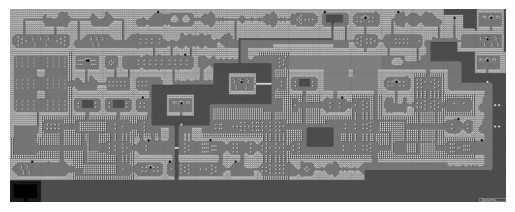

In [17]:
# Plot the image using matplotlib
map_img = cv2.imread('biomless_map.png')
map_rgb = cv2.cvtColor(map_img, cv2.COLOR_BGR2RGB)
map_gray = cv2.cvtColor(map_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(map_gray, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

In [9]:
def process_images_in_folder(folder_path, output_path, mask_name):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Process each image in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(folder_path, filename)
            modified_image_path = change_pixels(image_path, output_path, mask_name)
            print(f"Processed {filename}, saved as {modified_image_path}")

In [11]:
# Example usage of the function
output_path = 'biomless_world'  # Replace with the path to your output folder
folder_path = 'world'  # Replace with the path to your folder
mask_name = 'GRAVEYARD'  # Choose from 'GRAVEYARD', 'FOREST', 'MOUNT'
process_images_in_folder(folder_path, output_path, mask_name)

Processed 0.png, saved as biomless_world/0.png
Processed 1.png, saved as biomless_world/1.png
Processed 2.png, saved as biomless_world/2.png
Processed 3.png, saved as biomless_world/3.png
Processed 4.png, saved as biomless_world/4.png
Processed 5.png, saved as biomless_world/5.png
Processed 6.png, saved as biomless_world/6.png
Processed 7.png, saved as biomless_world/7.png
Processed 8.png, saved as biomless_world/8.png
Processed 9.png, saved as biomless_world/9.png
Processed 10.png, saved as biomless_world/10.png
Processed 11.png, saved as biomless_world/11.png
Processed 12.png, saved as biomless_world/12.png
Processed 13.png, saved as biomless_world/13.png
Processed 14.png, saved as biomless_world/14.png
Processed 15.png, saved as biomless_world/15.png
Processed 16.png, saved as biomless_world/16.png
Processed 17.png, saved as biomless_world/17.png
Processed 18.png, saved as biomless_world/18.png
Processed 19.png, saved as biomless_world/19.png
Processed 20.png, saved as biomless_worl